# Aula 5 - Problemas de Valor Inicial

$y'(t) = f(t,y);$

$y(t_{0}) = y_{0}$

$y' = t.y$

Obs: Uma forma de resolver esse problema seria integrando com $\int_{t_{0}}^{t}y'(\bar t)d\bar t$

$y(t_{k}) \approx w_{k}$

Usar $w_{0} = y_{0}$

$w_{k+1} = $ "A partir de $w_{k}$ e $t_{k}$, andar na direção dada por $f(t_{k}, w_{k})$ até $t_{k} + h \equiv t_{k+1}$"


### Método de Euler
$\rightarrow w_{k+1} w_{k} + h.f(t_{k}, w_{k})$



In [3]:
using Plots
gr(size = (600, 300))

Plots.GRBackend()

In [4]:
"""
    campo_ode(t0, tf, y0, yf, f; N = 10)
    campo_ode!(p, t0, tf, y0, yf, f; N = 10)

Desenha `y'(t) = f(t, y)` na caixa [t0, tf] x [y0, tf].
"""
function campo_ode!(p, t0, tf, y0, yf, f; N = 11)
    rt = range(t0, tf, length=N)
    ry = range(y0, yf, length=N)
    h = rt[2] - rt[1]
    C = vcat([[rt[i], ry[j], 0.9h, f(rt[i], ry[j])]' for i = 1:N, j = 1:N]...)
    C[:, 4] /= maximum(abs.(C[:, 4]))
    quiver!(p, C[:, 1], C[:, 2], quiver=(C[:, 3], C[:, 4]), c=:lightblue)
    scatter!(p, C[:, 1], C[:, 2], m=(2, :lightblue, stroke(1, :blue)))
    xlims!(t0 - h/2, tf + h/2)
    ylims!(y0 - h/2, yf + h/2)
    p
end

function campo_ode(args...; kargs...)
    p = plot(leg = false)
    campo_ode!(p, args...; kargs...)
end

campo_ode (generic function with 1 method)

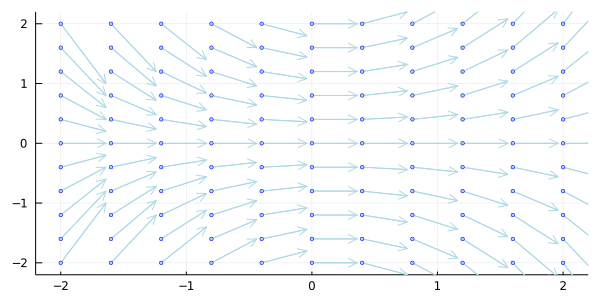

In [5]:
campo_ode(-2, 2, -2, 2, (t, y) -> t * y)

In [6]:
function euler(t0, tf, y0, f; N = 100)
    t = range(t0, tf, length = N+1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    for k = 1:N
        w[k+1] = w[k] + h * f(t[k], w[k])
    end
    return t, w
end

euler (generic function with 1 method)

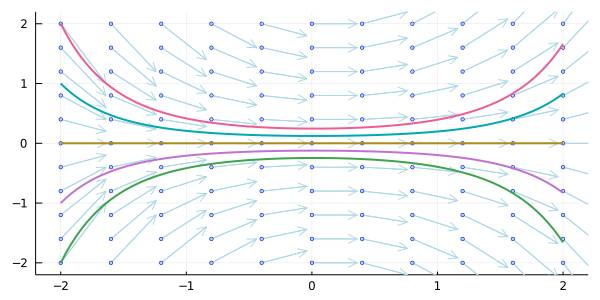

In [7]:
t0, tf = -2.0, 2.0
f(t, y) = t * y
p = campo_ode(t0, tf, -2, 2, f)
for y0 in [-2, -1, 0, 1, 2]
    t, y = euler(t0, tf, y0, f)
    plot!(p, t, y, lw = 2)
end
p

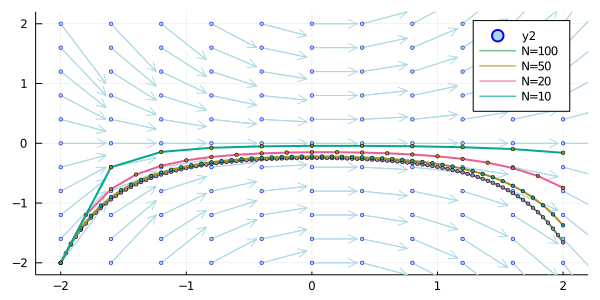

In [8]:
t0, tf = -2.0, 2.0
f(t, y) = t * y
p = campo_ode(t0, tf, -2, 2, f)
y0 = -2
for N in [100, 50, 20, 10]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw = 2, lab = "N=$N", leg = true)
    scatter!(p, t, y, lw = 2, ms = 2, lab = "")
end
p
#quantos mais pontos usar, melhor fica a solução

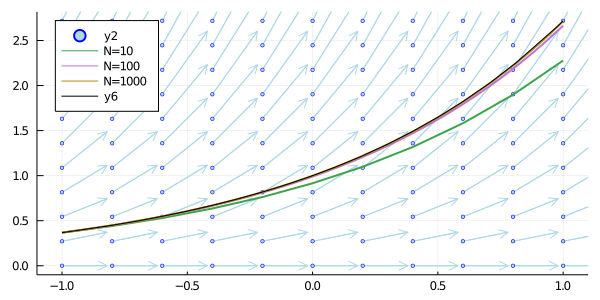

In [9]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t, y) = y
p = campo_ode(t0, tf, 0, ysol(tf), f)
for N in [10, 100, 1000]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw = 2, lab = "N=$N", leg = true)
end
plot!(p, ysol, t0, tf, c=:black, legend = :topleft)
p

$Runge-Kutta\hspace{4px}2^{a}$ (Euler-Aperfeiçoado, Modificado, Heun, Ponto-Médio)

Esses métodos calculam uma inclinação, depois outra inclinação, fazem uma combinação entre as duas e encontram uma inclinação melhor.

$Runge-Kutta\hspace{4px}4^{a}$

A mesma ideia, só que com 4 inclinações.

In [10]:
function taylor2(t0, tf, y0, f, ft, fy; N = 100)
    t = range(t0, tf, length = N + 1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    for k = 1:N
        fk = f(t[k], w[k])
        ftk = ft(t[k], w[k])
        fyk = fy(t[k], w[k])
        w[k+1] = w[k] + h * f(t[k], w[k]) + h^2 / 2 * (ftk + fyk * fk)
    end
    return t, w
end

taylor2 (generic function with 1 method)

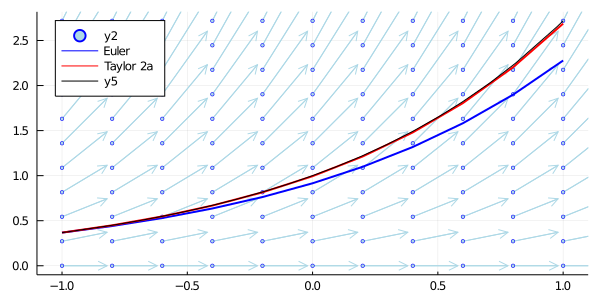

In [13]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t, y) = y
ft(t, y) = 0
fy(t, y) = 1
p = campo_ode(t0, tf, 0, ysol(tf), f)
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw = 2, lab = "Euler", c = :blue, leg = true)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw = 2, lab = "Taylor 2a", c = :red, leg = true)
plot!(p, ysol, t0, tf, c=:black, legend = :topleft)
p

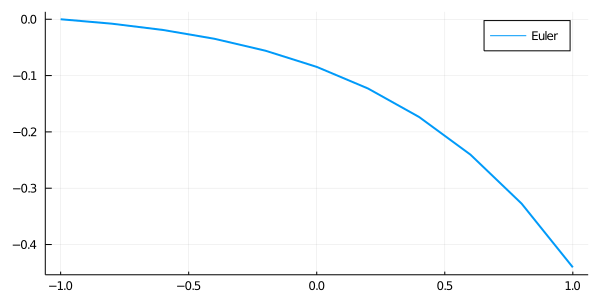

In [19]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t, y) = y
ft(t, y) = 0
fy(t, y) = 1
t, y = euler(t0, tf, y0, f, N=10)
plot(t, y-ysol.(t), lw = 2, lab = "Euler")
#t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
#plot!(p, t, y, lw = 2, lab = "Taylor 2a", c = :red, leg = true)

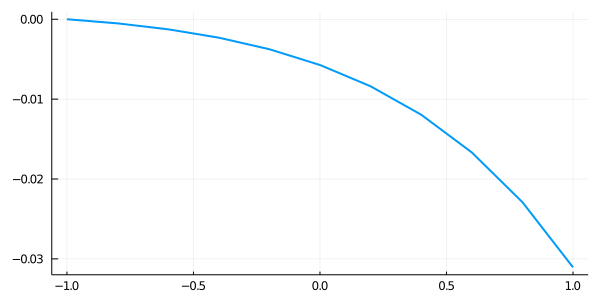

In [25]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t, y) = y
ft(t, y) = 0
fy(t, y) = 1
#t, y = taylor2(t0, tf, y0, f, ft, fy, N=100)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot(t, y - ysol.(t), lw = 2, leg = false)

### Runge-Kutta

$w_{k+1} = w_{k} + h.(\alpha\theta_{1} + \beta\theta_{2})$
<br>
$\theta_{1} = f(t_{k}, w_{k}); \hspace{8px}\theta_{2} = f(t_{k} + \delta.h, w_{k} + \gamma .h\theta_{1})$

$\theta_{2} = f(t+\delta h, w + \gamma h\theta_{1})$
$f(t, w) + f_{t}(t, w).\delta h + f_{y}(t, w).\gamma h\theta_{1} + o(\sqrt{(\delta h)^2 + (\gamma h\theta_{1})^2})$

$w_{k+1} = w_{k} + h.[\alpha\theta_{1} + \beta.(\theta_{1} + \delta h.f_{t} + \gamma h\theta_{1}.f_{y})]$

$w_{k+1} = w_{k} + h\theta_{1} + \frac{h^2}{2}(f_{t} + \theta_{1}f_{y})$


In [26]:
function rungekutta2(t0, tf, y0, f, β; N = 100)
    @assert β != 0
    t = range(t0, tf, length = N + 1)
    h = t[2] - t[1]
    w = zeros(N+1)
    w[1] = y0
    α = 1 - β
    δ = γ = 1 / 2β
    for k = 1:N
        θ₁ = f(t[k], w[k])
        θ₂ = f(t[k] + δ * h, w[k] + γ * h * θ₁)
        w[k+1] = w[k] + h * (α * θ₁ + β * θ₂)
    end
    return t, w
end

rungekutta2 (generic function with 1 method)

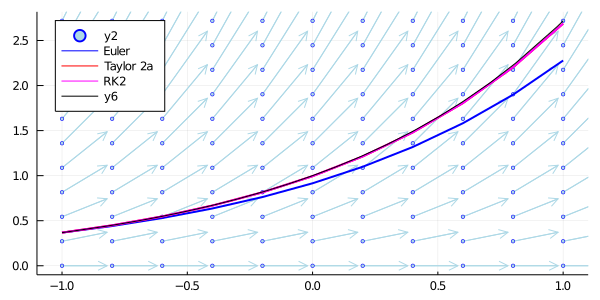

In [30]:
t0, tf = -1.0, 1.0
ysol(t) = exp(t)
y0 = ysol(t0)
f(t, y) = y
ft(t, y) = 0
fy(t, y) = 1
p = campo_ode(t0, tf, 0, ysol(tf), f)
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw = 2, lab = "Euler", c = :blue, leg = true)
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw = 2, lab = "Taylor 2a", c = :red, leg = true)
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=10)
plot!(p, t, y, lw = 2, lab = "RK2", c = :magenta, leg = true)
plot!(p, ysol, t0, tf, c=:black, legend = :topleft)
p

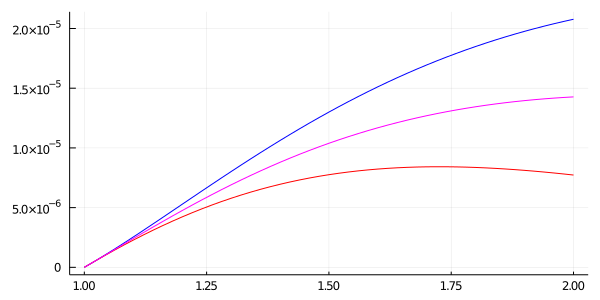

In [37]:
#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#

t0, tf = 1.0, 2.0
ysol(t) = t^2 * exp(-t)
y0 = ysol(t0)
f(t, y) = 2y / t - y

#t, y = euler(t0, tf, y0, f, N=100)
plot(leg=false)
t, y = rungekutta2(t0, tf, y0, f, 0.5, N=50)
plot!(t, y - ysol.(t), lw = 1, leg = false, c=:blue)
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=50)
plot!(t, y - ysol.(t), lw = 1, leg = false, c=:red)
t, y = rungekutta2(t0, tf, y0, f, 2/3, N=50)
plot!(t, y - ysol.(t), lw = 1, leg = false, c=:magenta)

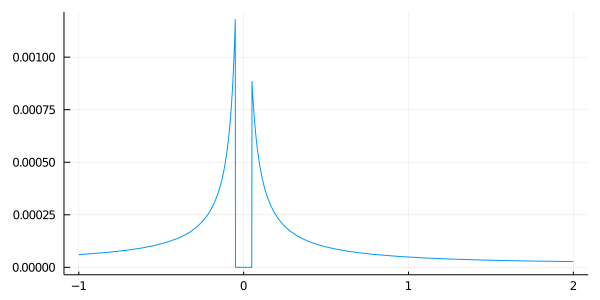

In [40]:
using LinearAlgebra
#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#

t0, tf = 1.0, 2.0
ysol(t) = t^2 * exp(-t)
y0 = ysol(t0)
f(t, y) = 2y / t - y

E(β) = begin
    abs(β) < 0.05 && return 0
    t, y = rungekutta2(t0, tf, y0, f, β, N=50)
    ys = ysol.(t)
    norm(y - ys)
end
plot(E, -1, 2, leg=false)

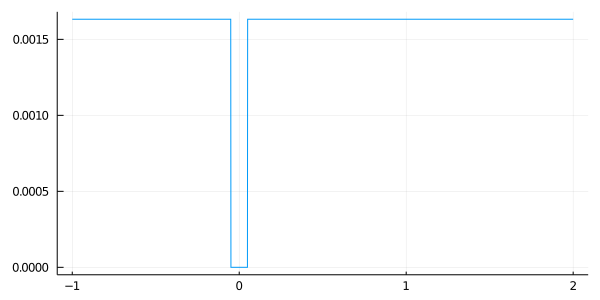

In [41]:
#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#

t0, tf = 1.0, 2.0
# ysol(t) = t^2 * exp(-t)
#f(t, y) = 2y / t - y
ysol(t) = exp(t)
f(t, y) = y
y0 = ysol(t0)

E(β) = begin
    abs(β) < 0.05 && return 0
    t, y = rungekutta2(t0, tf, y0, f, β, N=50)
    ys = ysol.(t)
    norm(y - ys)
end
plot(E, -1, 2, leg=false)